In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange

# from geopy.geocoders import Nominatim

from persiantools.jdatetime import JalaliDate


import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties


import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
farsi_font = FontProperties(
    fname='../../report/styles/fonts/XB Niloofar.ttf')

farsi = lambda x: get_display(arabic_reshaper.reshape(str(x)))

In [3]:
data_df = pd.read_csv('../data/raw_refahdb.zip')
data_df

,ID,ParentID,BirthDate,GenderId,postalcode,Provincename,countyname,isurban,AmCrdtr_95,Amdbtr_95,...,Cars_Count,CarsPrice_Sum,Trips_Count_AirNotPilgrimage,Trips_Count_NotAirNotPilgrimage,Trips_Count_AirPilgrimage,Trips_Count_NotAirPilgrimage,HasMojavezSenfi,Senf,HasBimeSalamat,BimeSalmat_Type
0,385996899,391863876,1978-03-22,2,6451967.0,خوزستان,شوشتر,True,207500000,307500000,...,0,0,0,0,0,0,0,NaN,0,NaN
1,2633686968,2633686968,1995-02-05,1,9577153.0,خراسان رضوي,تربت جام,True,137500000,110000000,...,1,795867494,0,0,0,0,0,NaN,1,روستاييان
2,312125928,1981002597,1970-05-13,2,3898155.0,مرکزي,خمين,False,0,0,...,0,0,0,0,0,0,0,NaN,1,روستاييان
3,70847160,70847160,1969-03-21,1,8318747.0,اصفهان,شاهين شهر و ميمه,True,135000000,167500000,...,1,913334400,0,0,0,0,0,NaN,0,NaN
4,663191175,9230116821,2004-06-19,2,451879.0,زنجان,زنجان,True,2500000,0,...,0,0,0,0,0,0,0,NaN,1,کارکنان دولت
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490986,4822361022,4822361022,1973-04-21,1,4384186.0,گيلان,رضوانشهر,True,7500000,7500000,...,1,855771499,0,0,0,0,0,NaN,1,روستاييان
1490987,2816587107,2816587107,1942-07-01,1,371474.0,قم,قم,True,227500000,375000000,...,0,0,0,0,1,0,0,NaN,1,ايرانيان
1490988,6680054253,6680054253,1945-09-11,1,5438134.0,آذربايجان شرقي,مرند,False,187500000,187500000,...,1,523117116,0,0,0,0,0,NaN,1,روستاييان
1490989,4142421696,4142421696,1977-09-21,1,7169644.0,فارس,شيراز,True,327500000,375000000,...,2,1661819838,0,0,0,0,0,NaN,1,سايراقشار-نظام ارجاع 1


In [4]:
data_df.ParentID.nunique()

500000

In [12]:
sample_hh = set(np.random.choice(data_df.ParentID.unique(), size=10_000))

In [14]:
sample_df = data_df[[i in sample_hh for i in data_df['ParentID']]]
sample_df.to_csv('../data/1k_refah_db.zip', index=False, compression={
    'method': 'zip',
    'archive_name': '1k_refah_db.csv'
})

In [11]:
data_df

,ID,ParentID,BirthDate,GenderId,postalcode,Provincename,countyname,isurban,AmCrdtr_95,Amdbtr_95,...,Cars_Count,CarsPrice_Sum,Trips_Count_AirNotPilgrimage,Trips_Count_NotAirNotPilgrimage,Trips_Count_AirPilgrimage,Trips_Count_NotAirPilgrimage,HasMojavezSenfi,Senf,HasBimeSalamat,BimeSalmat_Type
0,385996899,391863876,1978-03-22,2,6451967.0,خوزستان,شوشتر,True,207500000,307500000,...,0,0,0,0,0,0,0,NaN,0,NaN
1,2633686968,2633686968,1995-02-05,1,9577153.0,خراسان رضوي,تربت جام,True,137500000,110000000,...,1,795867494,0,0,0,0,0,NaN,1,روستاييان
2,312125928,1981002597,1970-05-13,2,3898155.0,مرکزي,خمين,False,0,0,...,0,0,0,0,0,0,0,NaN,1,روستاييان
3,70847160,70847160,1969-03-21,1,8318747.0,اصفهان,شاهين شهر و ميمه,True,135000000,167500000,...,1,913334400,0,0,0,0,0,NaN,0,NaN
4,663191175,9230116821,2004-06-19,2,451879.0,زنجان,زنجان,True,2500000,0,...,0,0,0,0,0,0,0,NaN,1,کارکنان دولت
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490986,4822361022,4822361022,1973-04-21,1,4384186.0,گيلان,رضوانشهر,True,7500000,7500000,...,1,855771499,0,0,0,0,0,NaN,1,روستاييان
1490987,2816587107,2816587107,1942-07-01,1,371474.0,قم,قم,True,227500000,375000000,...,0,0,0,0,1,0,0,NaN,1,ايرانيان
1490988,6680054253,6680054253,1945-09-11,1,5438134.0,آذربايجان شرقي,مرند,False,187500000,187500000,...,1,523117116,0,0,0,0,0,NaN,1,روستاييان
1490989,4142421696,4142421696,1977-09-21,1,7169644.0,فارس,شيراز,True,327500000,375000000,...,2,1661819838,0,0,0,0,0,NaN,1,سايراقشار-نظام ارجاع 1


In [5]:
family_df = data_df.groupby('ParentID').agg({'ID':'count'})

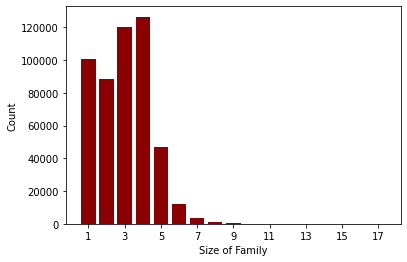

In [6]:
family_count = [np.sum(family_df['ID'] == i+1) for i in range(family_df['ID'].max())]

plt.bar(x=range(1, family_df['ID'].max() + 1), height=family_count, color='darkred')
plt.xticks(range(1, family_df['ID'].max() + 1, 2))
plt.xlabel('Size of Family')
plt.ylabel('Count')
plt.savefig('../../report/figures/EDA/family_size_histogram.pdf', bbox_inches='tight')

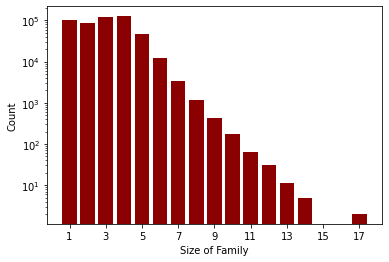

In [7]:
family_count = [np.sum(family_df['ID'] == i+1) for i in range(family_df['ID'].max())]

plt.bar(x=range(1, family_df['ID'].max() + 1), height=family_count, color='darkred')
plt.xticks(range(1, family_df['ID'].max() + 1, 2))
plt.xlabel('Size of Family')
plt.ylabel('Count')
plt.yscale('log')
plt.savefig('../../report/figures/EDA/family_size_histogram_log.pdf', bbox_inches='tight')

In [8]:
prv_df = data_df.groupby('Provincename').agg({'ParentID': lambda x: x.nunique()})
prv_df.sort_values('ParentID', ascending=False, inplace=True)

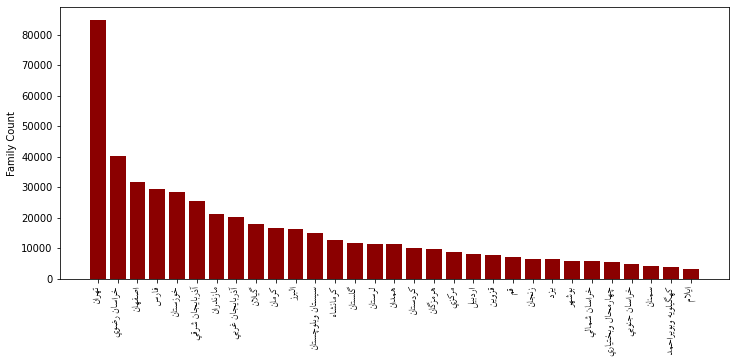

In [9]:
plt.figure(figsize=(12, 5))
xticks = [get_display(arabic_reshaper.reshape(i)) for i in prv_df.index.values]
plt.bar(xticks, prv_df['ParentID'], color='darkred')
plt.xticks(rotation=90, fontproperties=farsi_font)
plt.ylabel('Family Count')
plt.savefig('../../report/figures/EDA/province_family_count.pdf', bbox_inches='tight')

In [10]:
familyhead_df = data_df[data_df['ParentID'] == data_df['ID']]
familyhead_df

,ID,ParentID,BirthDate,GenderId,postalcode,Provincename,countyname,isurban,AmCrdtr_95,Amdbtr_95,...,Cars_Count,CarsPrice_Sum,Trips_Count_AirNotPilgrimage,Trips_Count_NotAirNotPilgrimage,Trips_Count_AirPilgrimage,Trips_Count_NotAirPilgrimage,HasMojavezSenfi,Senf,HasBimeSalamat,BimeSalmat_Type
1,2633686968,2633686968,1995-02-05,1,9577153.0,خراسان رضوي,تربت جام,True,137500000,110000000,...,1,795867494,0,0,0,0,0,NaN,1,روستاييان
3,70847160,70847160,1969-03-21,1,8318747.0,اصفهان,شاهين شهر و ميمه,True,135000000,167500000,...,1,913334400,0,0,0,0,0,NaN,0,NaN
10,6236060907,6236060907,1969-09-24,2,791873.0,هرمزگان,بندرعباس,False,325000000,1050000000,...,1,1084584600,0,0,0,1,0,NaN,0,NaN
11,5710446360,5710446360,1977-03-21,1,9519154.0,خراسان رضوي,تربت حيدريه,False,427500000,452500000,...,2,2550516001,0,0,0,0,0,NaN,1,روستاييان
19,5494437573,5494437573,1985-06-18,1,6354173.0,خوزستان,بندرماهشهر,True,167500000,162500000,...,1,1563428700,0,0,0,0,0,NaN,1,روستاييان
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490981,9454402278,9454402278,1980-05-28,1,6441833.0,خوزستان,دشت آزادگان,True,4500000000,3675000000,...,0,0,0,0,0,0,0,NaN,1,روستاييان
1490986,4822361022,4822361022,1973-04-21,1,4384186.0,گيلان,رضوانشهر,True,7500000,7500000,...,1,855771499,0,0,0,0,0,NaN,1,روستاييان
1490987,2816587107,2816587107,1942-07-01,1,371474.0,قم,قم,True,227500000,375000000,...,0,0,0,0,1,0,0,NaN,1,ايرانيان
1490988,6680054253,6680054253,1945-09-11,1,5438134.0,آذربايجان شرقي,مرند,False,187500000,187500000,...,1,523117116,0,0,0,0,0,NaN,1,روستاييان


In [11]:
familyhead_df['GenderId'].value_counts()

1    397247
2    102753
Name: GenderId, dtype: int64

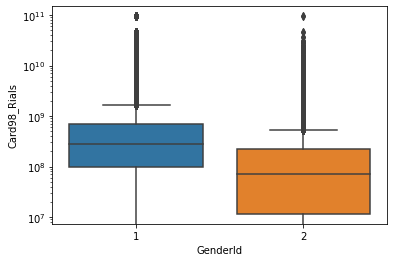

In [12]:
familyhead_df['Card98_Rials']
sns.boxplot(data=familyhead_df, x='GenderId', y='Card98_Rials')
plt.yscale('log')

In [15]:
# cities = set(data_df['countyname'].value_counts().index.values)

# cities = set(data_df['countyname'].value_counts().index.values)
# geolocator = Nominatim(user_agent='myapplication')

# city_coordinations = dict()
# for city in cities:
#     location = geolocator.geocode(city)
#     city_coordinations[city] = (location.raw['lat'], location.raw['lon'])
#     print(city, city_coordinations[city])
#     print(location.address)


In [4]:
def convert_datetime(x):
    try:
        return JalaliDate(pd.to_datetime(x))
    except:
        return None

In [5]:
data_df['BirthDate_Jalali'] = [convert_datetime(i) for i in tqdm(data_df['BirthDate'])]

100%|█████████████████████████████████████████████████████████████████████| 1490991/1490991 [02:08<00:00, 11637.59it/s]


In [6]:
data_df.isna().sum()

ID                                       0
ParentID                                 0
BirthDate                            13499
GenderId                                 0
postalcode                           20640
Provincename                         20640
countyname                           20640
isurban                              20648
AmCrdtr_95                               0
Amdbtr_95                                0
frstPrd_95                               0
lstPrd_95                                0
SmBnft_95                                0
AmCrdtr_96                               0
Amdbtr_96                                0
frstPrd_96                               0
lstPrd_96                                0
SmBnft_96                                0
AmCrdtr_97                               0
Amdbtr_97                                0
frstPrd_97                               0
lstPrd_97                                0
SmBnft_97                                0
AmCrdtr_98 

In [7]:
def is_missing_value(pid: int, cols = ['postalcode', 'BirthDate_Jalali']):
    return data_df[data_df['ParentID'] == pid][cols].isna().sum().sum() > 0

In [8]:
missing_hhs = set(i for i in tqdm(data_df['ParentID'].unique()) if is_missing_value(i))

100%|█████████████████████████████████████████████████████████████████████████| 500000/500000 [32:15<00:00, 258.31it/s]


In [10]:
len(missing_hhs)

20929

In [11]:
filter_data_df = data_df[[i not in missing_hhs for i in tqdm(data_df['ParentID'])]].copy()

100%|███████████████████████████████████████████████████████████████████| 1490991/1490991 [00:00<00:00, 2361630.02it/s]


In [14]:
filter_data_df.reset_index(drop=True, inplace=True)

In [15]:
filter_data_df.isna().sum()

ID                                       0
ParentID                                 0
BirthDate                                0
GenderId                                 0
postalcode                               0
Provincename                             0
countyname                               0
isurban                                  0
AmCrdtr_95                               0
Amdbtr_95                                0
frstPrd_95                               0
lstPrd_95                                0
SmBnft_95                                0
AmCrdtr_96                               0
Amdbtr_96                                0
frstPrd_96                               0
lstPrd_96                                0
SmBnft_96                                0
AmCrdtr_97                               0
Amdbtr_97                                0
frstPrd_97                               0
lstPrd_97                                0
SmBnft_97                                0
AmCrdtr_98 

In [17]:
filter_data_df.fillna(-1, inplace=True)

In [18]:
filter_data_df.to_csv('../data/clean_refahdb.zip', compression={
    'method': 'zip', 'archive_name': 'clean_refahdb.csv'
})